In [426]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
import numpy as np


# we can dispaly it with matplotlib
image = cv2.imread('/Users/sin-yujin/Desktop/28.png', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# show our image
#plt.figure()
#plt.axis("off")
#plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[250.75669643 249.82366071 248.89285714]
[0.22689541 0.04427227 0.03597122]
^^
[180.94594595 177.45945946 176.81081081]
[92.89285714 85.96428571 84.78571429]
['#faf9f8', '#000000', '#b4b1b0', '#5c5554']

[0.07716786 0.17820207 0.71877486 0.01471758 0.01113763]
[(0.07716785998408911, '#34232c'), (0.17820206841686556, '#f59808'), (0.718774860779634, '#000000'), (0.0147175815433572, '#eeebef'), (0.011137629276054098, '#9f3116')]


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


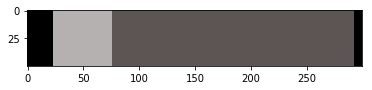

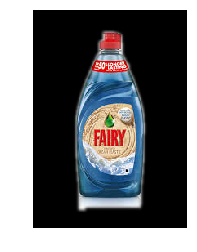

In [424]:
import numpy as np
import cv2

def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1) #0부터 clt.labels_까지
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
   # normalize the histogram, such that it sums to one
    hist = hist.astype("float") #type 변경
    hist /= hist.sum()
    hex_colors = [
        rgb2hex(center) for center in clt.cluster_centers_
    ]
    #print(clt.cluster_centers_)
    for i in clt.cluster_centers_:
        print(i)
        if (rgb2hex(i) == '#000000'):
            print("^^")
            #type(clt.cluster_centers_)
            clt.cluster_centers_ = np.delete( clt.cluster_centers_,i,axis=0)
    print(hex_colors)
  # return the histogram
    return hist


def plot_colors(hist, centroids):
   # initialize the bar chart representing the relative frequency
   # of each of the colors
   #hist = np.delete(hist,0)
   bar = np.zeros((50, 300, 3), dtype = "uint8")
   startX = 0
   # loop over the percentage of each cluster and the color of
   # each cluster
   for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
      endX = startX + (percent * 300)
      cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
      startX = endX
   
   # return the bar chart
   print(list(zip(hist, list(hex_colors))))

   return bar

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color



hist = centroid_histogram(clt)

type(clt.cluster_centers_)
#hist 검정 삭제
#print(hist)
print()
#hist = np.delete(hist,0)
print(hist)
#print("hist")
#print(hist)
#clt.cluster_centers_ = np.delete(clt.cluster_centers_,0)
bar = plot_colors(hist, clt.cluster_centers_)
#list(label_counts.values())
#list(zip(hist, list(label_counts.values())))
# show our color bart
plt.figure()
#plt.axis("off")
plt.imshow(bar)
plt.show()


#show image

# we can dispaly it with matplotlib
imageFile = '/Users/sin-yujin/Desktop/2.png'
image = cv2.imread(imageFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

#print(clt.cluster_centers_)


In [40]:
# https://github.com/rmotr/color-extractor-service/blob/master/demo/Extract%20colors%20from%20images.ipynb

['#000000', '#939499', '#2b2b2b', '#5d5d5e', '#c9cad2']


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


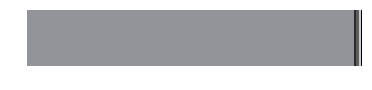

['#000000', '#c7cad4', '#454646', '#949598', '#ecedf6']


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


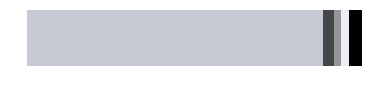

/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


['#000000', '#90a6d9', '#1d378a', '#cddbef', '#536b9e']


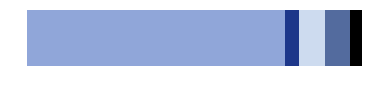

/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


['#1d3889', '#000000', '#c9dcf5', '#3d6bbb', '#84a0d6']


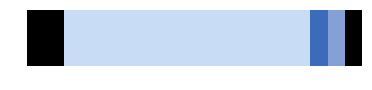

['#3a4455', '#000000', '#346cca', '#8bacdc', '#1a3fa1']


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


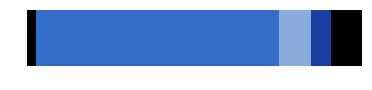

['#e2e7f4', '#000000', '#40454c', '#80a0c8', '#224aa6']


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


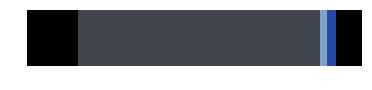

['#000000', '#eeeffa', '#606061', '#a9a9b1', '#2d2d2e']


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


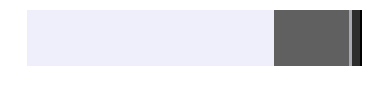

/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


['#000000', '#edeefa', '#a8a7ae', '#2e2e2e', '#606061']


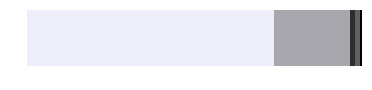

/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


['#000000', '#ececf9', '#929396', '#474747', '#c9c9d2']


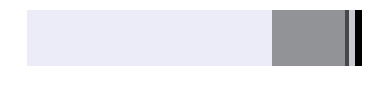

['#000000', '#dfe1eb', '#a0a1a3', '#474848', '#f4f4fc']


/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


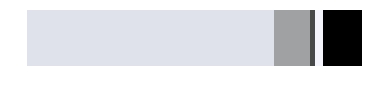

/Users/sin-yujin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


['#000000', '#fbfbfa', '#616160', '#9d9d9c', '#2e2e2e']


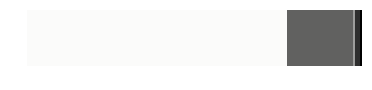

In [430]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
import numpy as np

# we can dispaly it with matplotlib
image = cv2.imread('/Users/sin-yujin/Desktop/28.png', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# show our image
#plt.figure()
#plt.axis("off")
#plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)



# we can dispaly it with matplotlib
image = cv2.imread('/Users/sin-yujin/Desktop/28.png', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

black = np.array([0,0,0])

 
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
"""
def centroid_histogram(clt):
   numLabels = np.arange(0, len(np.unique(clt.labels_))+1) #0부터 clt.labels_까지
   print(numLabels)
   ( hist, _) = np.histogram(clt.labels_, bins = numLabels)
   # normalize the histogram, such that it sums to one
   hist = hist.astype("float") #type 변경
   hist /= hist.sum()

   hex_colors = [
       rgb2hex(center) for center in clt.cluster_centers_
   ]
    
   print(hex_colors)
  # return the histogram
   return hist

"""
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1) #0부터 clt.labels_까지
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
   # normalize the histogram, such that it sums to one
    hist = hist.astype("float") #type 변경
    hist /= hist.sum()
    hex_colors = [
        rgb2hex(center) for center in clt.cluster_centers_
    ]
    
    #print(clt.cluster_centers_)
    for i in clt.cluster_centers_:
        #print(i)
        if (rgb2hex(i) == '#000000'):
            #print("^^")
            #type(clt.cluster_centers_)
            clt.cluster_centers_ = np.delete( clt.cluster_centers_,i,axis=0)
    print(hex_colors)
  # return the histogram
    return hist

def plot_colors(hist, centroids):
   # initialize the bar chart representing the relative frequency
   # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
 
   # loop over the percentage of each cluster and the color of
   # each cluster
    for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
         color.astype("uint8").tolist(), -1)
        startX = endX
   
   # return the bar chart
    return bar


# show our image
#plt.figure()
#plt.axis("off")
#plt.imshow(image)
gap = image.shape[0]//10

for i in range(0, image.shape[0], gap):
    start = i
    end = i + gap
    if(end > image.shape[0]):
        end = image.shape[0]
    
    crop_img = image[start:end, 0:image.shape[1]]
    #cv2.imshow("cropping", crop_img)
    #cv2.waitKey(0)
    #print(crop_img.shape[0], crop_img.shape[1])
    
    each_image = crop_img.reshape((crop_img.shape[0] * crop_img.shape[1], 3)) #픽셀화
    #each_image = each_image.logical_not(0)
    
    #if (each_image.all != (0)):
    #    print(each_image)
    if (np.all(each_image != (0,0,0))):
        print(each_image)
    
    clt = KMeans(n_clusters = 5)
    clt.fit(each_image)
    
    hist = centroid_histogram(clt)
    #print(hist)
    #print(clt.cluster_centers_)
    bar = plot_colors(hist, clt.cluster_centers_)
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    



# reshape the image to be a list of pixels
#image = image.reshape(image.shape[0] * image.shape[1], 3) #채널의 개수, 행 개수
# cluster the pixel intensities
#clt = KMeans(n_clusters = 5)
#clt.fit(image)



# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
#hist = centroid_histogram(clt)
#bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
#plt.figure()
#plt.axis("off")
#plt.imshow(bar)
#plt.show()

In [383]:
def centroid_histogram(clt):
   unq_lab = np.unique(clt.labels_)
   #print(unq_lab)
   print(clt.cluster_centers_)

   for i in clt.cluster_centers_:
      print(i)
      if (rgb2hex(i) == '#000000'):
         del clt.cluster_centers_[i]


   print(clt)
   hex_colors = [rgb2hex(center) for center in clt.cluster_centers_]
   print(hex_colors)
    
   #del hex_colors[hex_colors.index('#000000')]
   #print(hex_colors)
    
    # grab the number of different clusters and create a histogram
   # based on the number of pixels assigned to each cluster
   numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
   #numLabels = np.delete(numLabels, black)
   #print(numLabels.shape)
   #numLabels.sort()
   #print(numLabels)
   (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
   # normalize the histogram, such that it sums to one
   hist = hist.astype("float")
   hist /= hist.sum()
     
   # return the histogram
   return hist